# 2.Clasification

Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#model selection
from sklearn.model_selection import train_test_split

#classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#Experiment with deeplearning eh multi layer JST
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

sns.set()
%matplotlib inline
classifier = 'JST_keras'
postfix = '_no_outliers_heatmap'

### Import datasets

In [2]:
df = pd.read_csv('data/main_dataset_no_outliers_v2.csv')
y = df['best_pos']
X = df.drop(['best_pos'], axis=1)
d = joblib.load('data/label_encoder_model_v2.sav')
print(X.shape, y.shape)

(17398, 57) (17398,)


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5]),
 <a list of 29 Text yticklabel objects>)

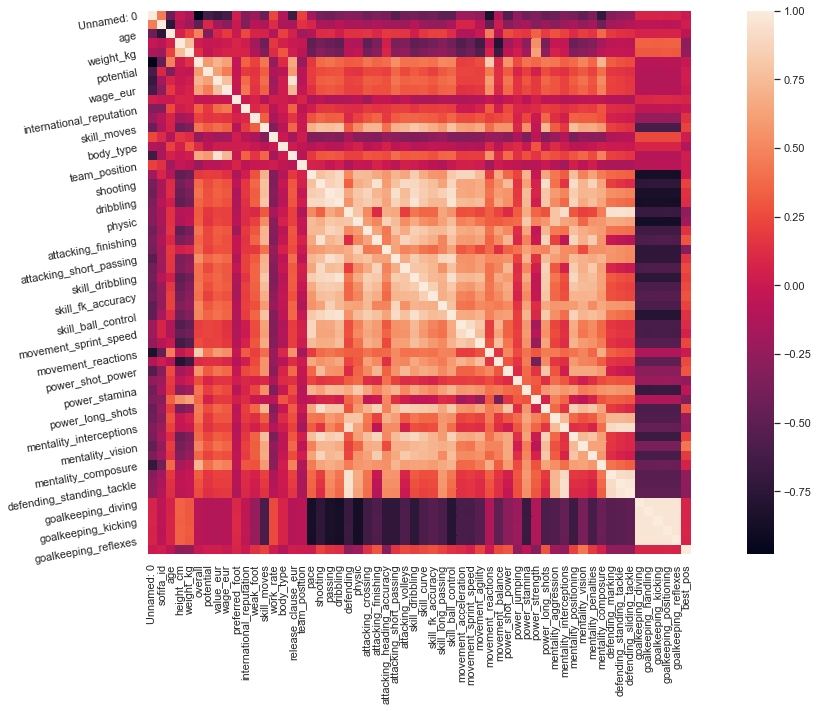

In [3]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=10)

Nice, let's build a dataframe using "Heatmap correlation" feature

In [4]:
corr['best_pos']

Unnamed: 0                    0.003643
sofifa_id                     0.032815
age                          -0.058471
height_cm                    -0.270357
weight_kg                    -0.252414
overall                      -0.008289
potential                     0.031111
value_eur                     0.037022
wage_eur                     -0.002788
preferred_foot                0.080199
international_reputation      0.000987
weak_foot                     0.141833
skill_moves                   0.226393
work_rate                     0.020594
body_type                    -0.093223
release_clause_eur            0.030733
team_position                 0.014313
pace                          0.014349
shooting                      0.220053
passing                       0.144341
dribbling                     0.124996
defending                    -0.265184
physic                       -0.197100
attacking_crossing            0.144924
attacking_finishing           0.289749
attacking_heading_accurac

In [5]:
corr['best_pos'].loc[corr['best_pos']>0].keys() #select feature with corelation more than 0.1 with best_pos

Index(['Unnamed: 0', 'sofifa_id', 'potential', 'value_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'pace', 'shooting', 'passing',
       'dribbling', 'attacking_crossing', 'attacking_finishing',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_long_shots', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'best_pos'],
      dtype='object')

In [6]:
feature = ['weak_foot', 'skill_moves', 'shooting', 'attacking_crossing',
       'attacking_finishing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_agility', 'movement_balance', 'power_shot_power',
       'power_long_shots', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes',
        'potential', 'overall', 'pace', 'passing', 'dribbling', 'defending', 'physic'] #combine with my previous feature
X = X[feature]
X.head()

weak_foot  skill_moves  shooting  attacking_crossing  attacking_finishing  \
0          4            4      89.0                  66                   89   
1          3            3      50.0                  25                   37   
2          2            4      69.0                  83                   66   
3          3            4      77.0                  77                   77   
4          3            3      74.0                  90                   60   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               79           78                 78   
1                 39               65           62                 56   
2                 75               83           82                 46   
3                 65               82           67                 71   
4                 64               80           85                 88   

   skill_long_passing  ...  goalkeeping_kicking  goalkeeping_positioning  \
0                  73  ...                    5                        4   
1                  77  ...                    9                       13   
2                  75  ...                   15                        7   
3                  80  ...                   13                        9   
4                  77  ...                    8                       16   

   goalkeeping_reflexes  potential  overall  pace  passing  dribbling  \
0                     4         83       83  69.0     75.0       80.0   
1                    11         83       83  56.0     61.0       63.0   
2                    13         82       82  87.0     77.0       83.0   
3                     8         82       82  81.0     79.0       83.0   
4                     6         82       82  69.0     81.0       76.0   

   defending  physic  
0       30.0    65.0  
1       86.0    82.0  
2       69.0    53.0  
3       46.0    75.0  
4       82.0    79.0  

[5 rows x 29 columns]

## Clasify

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y), test_size=0.25, random_state=10101)

In [11]:
model = keras.models.load_model('model/JST_keras_v2_test_overnight_no_outliers_heatmap.h5')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 29)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 837
Trainable params: 837
Non-trainable params: 0
_________________________________________________________________


In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

4350/4350 [==============================] - 0s 36us/sample - loss: 0.3892 - accuracy: 0.8566


In [16]:
classes = d['best_pos'].classes_
print(*zip(range(8),classes),sep='\n')

(0, 'Back')
(1, 'Fwd')
(2, 'Goal_Keeper')
(3, 'Mid_Centre')
(4, 'Mid_Side')


In [17]:
result = model.predict(X_test)
result = np.argmax(result,axis=1)
result

array([2, 1, 0, ..., 4, 3, 4], dtype=int64)

In [18]:
result = pd.DataFrame(result)
result_inverse = d['best_pos'].inverse_transform(np.ravel(result))

In [19]:
np.argmax(y_test, axis=1)

array([2, 1, 0, ..., 4, 3, 4], dtype=int64)

In [20]:
print(classification_report(np.argmax(y_test, axis=1), result, zero_division=True))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1471
           1       0.87      0.80      0.83       769
           2       1.00      1.00      1.00       423
           3       0.88      0.79      0.83      1162
           4       0.57      0.68      0.62       525

    accuracy                           0.86      4350
   macro avg       0.85      0.85      0.84      4350
weighted avg       0.86      0.86      0.86      4350



In [21]:
report = classification_report(np.argmax(y_test, axis=1), result, zero_division=True, output_dict=True)
df_report = pd.DataFrame(report).T
df_report.to_csv('output/'+ classifier + postfix +'.csv')

In [22]:
df_report

precision    recall  f1-score      support
0              0.911384  0.957852  0.934040  1471.000000
1              0.866760  0.803641  0.834008   769.000000
2              1.000000  1.000000  1.000000   423.000000
3              0.880497  0.792599  0.834239  1162.000000
4              0.570740  0.676190  0.619006   525.000000
accuracy       0.856552  0.856552  0.856552     0.856552
macro avg      0.845876  0.846056  0.844259  4350.000000
weighted avg   0.862750  0.856552  0.858090  4350.000000

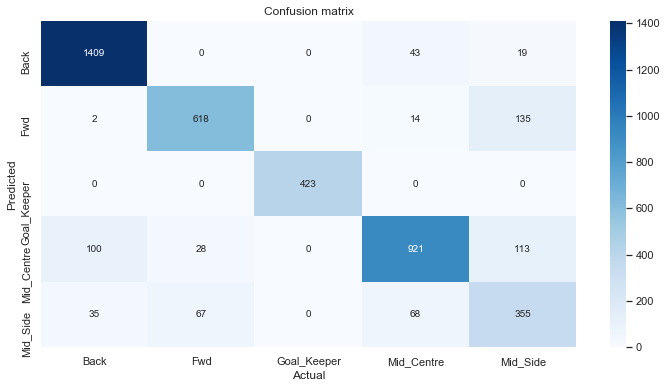

In [23]:
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), result)
plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=classes, 
            yticklabels=classes,
            cmap="Blues",
            fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()